<a href="https://colab.research.google.com/github/JaeminKIM-Irene/FC_AI_ML_Project/blob/main/irenekim/ML_Project_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# 설치에 필요한 라이브러리들이 있다면 모두 적어둡니다. anaconda에 기본적으로 설치되지 않은 라이브러리들을 적어두세요.
!pip install lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold
from functools import partial

from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay

In [54]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# read data
result_list = []
base_url = '/content/drive/MyDrive/Colab Notebooks/data/playground-series-s3e23/'
train = pd.read_csv(base_url+'train.csv', index_col='id')
test = pd.read_csv(base_url+'test.csv', index_col='id')
submission = pd.read_csv(base_url+'sample_submission.csv', index_col='id')

with pd.option_context('display.min_rows', 6) :
  display(train)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,1534.04,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False
101762,136.0,18.0,18.0,1.0,296.0,1704.57,0.02,44.82,44.08,77011.02,...,102,1,11,0,22.0,31.0,162.0,135.0,35.0,False


In [56]:
# data split for baseline model
from sklearn.model_selection import train_test_split

X = train.drop(columns=['defects'])
y = train.defects

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=6, stratify=y)

In [76]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(81410, 21) (81410,) (20353, 21) (20353,)


## Baseline Model

In [121]:
model = LGBMClassifier(random_state=61)

model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3552
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226643 -> initscore=-1.227365
[LightGBM] [Info] Start training from score -1.227365


LGBMClassifier(random_state=61)

In [128]:
model = XGBClassifier(random_state=61)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=61, ...)

In [132]:
model = ExtraTreesClassifier(random_state=61)

model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=61)

In [136]:
model = CatBoostClassifier(random_state=61)

model.fit(X_train, y_train)

Learning rate set to 0.067421
0:	learn: 0.6550846	total: 25.8ms	remaining: 25.7s
1:	learn: 0.6226876	total: 57.1ms	remaining: 28.5s
2:	learn: 0.5956071	total: 84.4ms	remaining: 28s
3:	learn: 0.5726485	total: 105ms	remaining: 26.3s
4:	learn: 0.5529076	total: 133ms	remaining: 26.5s
5:	learn: 0.5358549	total: 154ms	remaining: 25.6s
6:	learn: 0.5216082	total: 175ms	remaining: 24.9s
7:	learn: 0.5090727	total: 200ms	remaining: 24.8s
8:	learn: 0.4984376	total: 223ms	remaining: 24.6s
9:	learn: 0.4895735	total: 245ms	remaining: 24.3s
10:	learn: 0.4819180	total: 268ms	remaining: 24.1s
11:	learn: 0.4754750	total: 288ms	remaining: 23.7s
12:	learn: 0.4699663	total: 312ms	remaining: 23.7s
13:	learn: 0.4649446	total: 333ms	remaining: 23.5s
14:	learn: 0.4608082	total: 356ms	remaining: 23.4s
15:	learn: 0.4573485	total: 377ms	remaining: 23.2s
16:	learn: 0.4541506	total: 401ms	remaining: 23.2s
17:	learn: 0.4513505	total: 428ms	remaining: 23.3s
18:	learn: 0.4485599	total: 449ms	remaining: 23.2s
19:	learn:

In [140]:
model = RandomForestClassifier(random_state=61)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=61)

In [141]:
print('======Prediction======')
pred_train = model.predict_proba(X_train)[:,1]
pred_val = model.predict_proba(X_val)[:,1]

train_score = roc_auc_score(y_train, pred_train)
val_score = roc_auc_score(y_val, pred_val)

print("Train Score : %.4f" % train_score)
print("Validation Score : %.4f" % val_score)

======Prediction======
Train Score : 1.0000
Validation Score : 0.7764


In [142]:
cm=confusion_matrix(y_val, np.greater_equal(pred_val, 0.5).astype(int))

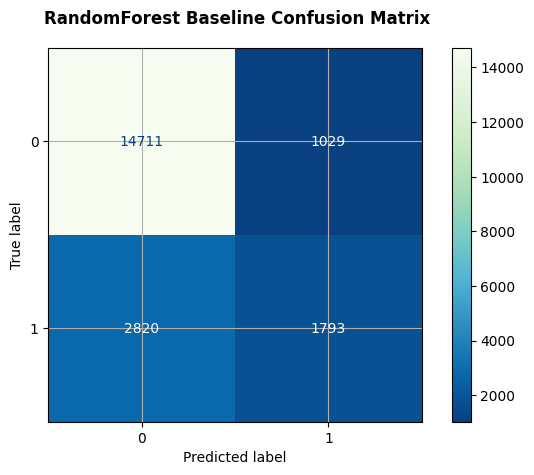

In [119]:
#plt.figure(figsize=(3, 3))
cm = confusion_matrix(y_val, np.greater_equal(pred_val, 0.5).astype(int))
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='GnBu_r')
plt.suptitle('RandomForest Baseline Confusion Matrix', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('rf_baseline.png')
plt.grid()

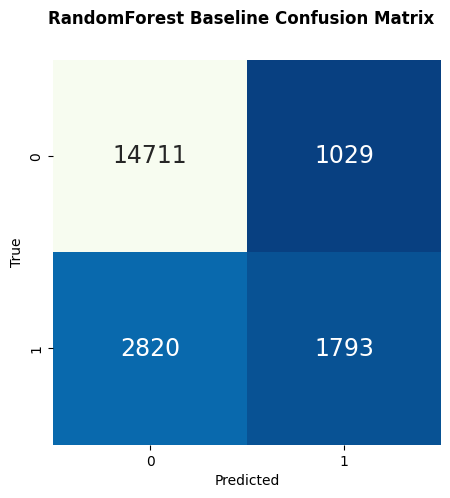

In [143]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, cmap='GnBu_r', cbar=False, fmt='.0f', annot_kws={"size": 17})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.suptitle('RandomForest Baseline Confusion Matrix', fontsize=12, fontweight='bold')
    plt.savefig('rf_baseline.png')
    plt.show()

plot_confusion_matrix(cm)